# Final Project
## Date: 06/18/2021
## Team: Bryce Randolph, Jeannie Davis, Harsandeep Singh, Kevin Robell
---

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

## What we are going to predict
We want to predict the winner of an NBA game based on the game stats from the 2019 season which is in the HOME_TEAM_WINS column.


## Choice of Dataset
Our dataset is focused on the 2019 season from this dataset of NBA games(games.csv). https://www.kaggle.com/nathanlauga/nba-games. We are choosing to make the program modular enough that other seasons can also be analyzed, but only a single season is chosen at a time to stay within the goals of the project. Drop the games.csv in the same folder as this file to run the following code.

## Predictors
To predict the winner of each game we will use all of the game stats except for the PTS_away and PTS_home columns. In addition, two predictors have been added, the REB_PCT_away and REB_PCT_home columns, based upon the REB_away and REB_home columns as seen below.

#### List of Predictors 
 8   FG_PCT_home       1241 non-null   float64   
 9   FT_PCT_home       1241 non-null   float64   
 10  FG3_PCT_home      1241 non-null   float64   
 11  AST_home          1241 non-null   float64   
 12  REB_home          1241 non-null   float64   
 15  FG_PCT_away       1241 non-null   float64   
 16  FT_PCT_away       1241 non-null   float64   
 17  FG3_PCT_away      1241 non-null   float64   
 18  AST_away          1241 non-null   float64   
 19  REB_away          1241 non-null   float64   
 21  REB_PCT_away      1241 non-null   float64   
 22  REB_PCT_home      1241 non-null   float64   

---
## Reading the Data

In [2]:
df = pd.read_csv("games.csv")
df = df[df.SEASON == 2019]

## Initial Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1206 to 17677
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     1241 non-null   object 
 1   GAME_ID           1241 non-null   int64  
 2   GAME_STATUS_TEXT  1241 non-null   object 
 3   HOME_TEAM_ID      1241 non-null   int64  
 4   VISITOR_TEAM_ID   1241 non-null   int64  
 5   SEASON            1241 non-null   int64  
 6   TEAM_ID_home      1241 non-null   int64  
 7   PTS_home          1241 non-null   float64
 8   FG_PCT_home       1241 non-null   float64
 9   FT_PCT_home       1241 non-null   float64
 10  FG3_PCT_home      1241 non-null   float64
 11  AST_home          1241 non-null   float64
 12  REB_home          1241 non-null   float64
 13  TEAM_ID_away      1241 non-null   int64  
 14  PTS_away          1241 non-null   float64
 15  FG_PCT_away       1241 non-null   float64
 16  FT_PCT_away       1241 non-null   floa

In [4]:
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,1.241000e+03,1.241000e+03,1.241000e+03,1241.0,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,2.247261e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,112.274778,0.463043,0.769757,0.359782,24.710717,45.438356,1.610613e+09,110.466559,0.455907,0.771137,0.353089,23.791297,44.197421,0.536664
std,5.922460e+06,8.505847e+00,8.505253e+00,0.0,8.505847e+00,12.781012,0.056152,0.098386,0.085668,4.850270,6.845032,8.505253e+00,12.447984,0.054403,0.102825,0.084250,4.851417,6.680293,0.498855
min,1.190000e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,68.000000,0.269000,0.400000,0.118000,11.000000,24.000000,1.610613e+09,70.000000,0.308000,0.375000,0.094000,10.000000,25.000000,0.000000
25%,2.190021e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,104.000000,0.425000,0.706000,0.300000,21.000000,41.000000,1.610613e+09,102.000000,0.418000,0.706000,0.297000,20.000000,40.000000,0.000000
50%,2.190052e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,112.000000,0.462000,0.778000,0.359000,25.000000,45.000000,1.610613e+09,110.000000,0.455000,0.774000,0.353000,24.000000,44.000000,1.000000
75%,2.190083e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,120.000000,0.505000,0.838000,0.417000,28.000000,50.000000,1.610613e+09,119.000000,0.494000,0.840000,0.406000,27.000000,48.000000,1.000000
max,5.190011e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,158.000000,0.633000,1.000000,0.629000,43.000000,67.000000,1.610613e+09,159.000000,0.674000,1.000000,0.680000,40.000000,65.000000,1.000000


In [5]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
1207,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
1208,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
1209,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
1210,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1


## Initial preprocessing and cleaning

The dataset doesn't have any na values so it's unnecessary to drop columns for that reason. All games are final which means we don't need to drop partially completed games. At the same time, the columns GAME_DATE_EST, GAME_ID, GAME_STATUS_TEXT, HOME_TEAM_ID, VISITOR_TEAM_ID, SEASON, TEAM_ID_home, PTS_home, TEAM_ID_away, and PTS_away aren't used so they will all be dropped.

In [6]:
df.isna().sum() # This also Shows that data doesn't have NA values.

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [7]:
#Create new rebound percentage columns
df['REB_PCT_away'] = df['REB_away'] / (df['REB_away'] + df['REB_home'])
df['REB_PCT_home'] = df['REB_home'] / (df['REB_away'] + df['REB_home'])
#Create new point diffirential column for linear regression
df['PTS_DIFF_home'] = df['PTS_home'] - df['PTS_away']

In [8]:
col_to_drop = ['GAME_ID', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'PTS_home', 'PTS_away', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away']
df.drop(col_to_drop, axis = 1, inplace=True)  #Dropping the useless/not relevant columns. 

In [9]:
df.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home,PTS_DIFF_home
1206,0.443,0.591,0.357,25.0,41.0,0.483,0.643,0.314,23.0,46.0,0,0.528736,0.471264,-13.0
1207,0.463,0.857,0.368,21.0,41.0,0.458,0.955,0.424,26.0,35.0,0,0.460526,0.539474,-3.0
1208,0.427,0.808,0.344,18.0,39.0,0.443,0.857,0.359,25.0,42.0,0,0.518519,0.481481,-6.0
1209,0.513,0.913,0.353,25.0,37.0,0.430,0.759,0.333,23.0,43.0,1,0.537500,0.462500,11.0
1210,0.505,0.588,0.340,32.0,44.0,0.507,0.912,0.407,29.0,37.0,1,0.456790,0.543210,10.0


## Exploration and Visualization
We took a look at the data to see which predictors correlated well with the outcome of the game and created some graphs to look at how certain predictors factored into who ended up winning.

In [10]:
df.info() # Basic data exploration

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1206 to 17677
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FG_PCT_home     1241 non-null   float64
 1   FT_PCT_home     1241 non-null   float64
 2   FG3_PCT_home    1241 non-null   float64
 3   AST_home        1241 non-null   float64
 4   REB_home        1241 non-null   float64
 5   FG_PCT_away     1241 non-null   float64
 6   FT_PCT_away     1241 non-null   float64
 7   FG3_PCT_away    1241 non-null   float64
 8   AST_away        1241 non-null   float64
 9   REB_away        1241 non-null   float64
 10  HOME_TEAM_WINS  1241 non-null   int64  
 11  REB_PCT_away    1241 non-null   float64
 12  REB_PCT_home    1241 non-null   float64
 13  PTS_DIFF_home   1241 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 145.4 KB


In [11]:
df.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home,PTS_DIFF_home
1206,0.443,0.591,0.357,25.0,41.0,0.483,0.643,0.314,23.0,46.0,0,0.528736,0.471264,-13.0
1207,0.463,0.857,0.368,21.0,41.0,0.458,0.955,0.424,26.0,35.0,0,0.460526,0.539474,-3.0
1208,0.427,0.808,0.344,18.0,39.0,0.443,0.857,0.359,25.0,42.0,0,0.518519,0.481481,-6.0
1209,0.513,0.913,0.353,25.0,37.0,0.430,0.759,0.333,23.0,43.0,1,0.537500,0.462500,11.0
1210,0.505,0.588,0.340,32.0,44.0,0.507,0.912,0.407,29.0,37.0,1,0.456790,0.543210,10.0


### Exploratory Graphs

##### Histogram plots

In [12]:
# #This pairplot shows the relationship between different field goal percentage stats.
# sns.pairplot(df, hue='HOME_TEAM_WINS', vars=['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away']);
# #This might take some time to load based upon the size of a dataset. Comment out for now.

In [13]:
# #This pairplot shows the relationship between different rebounding and assist stats.
# sns.pairplot(df, hue='HOME_TEAM_WINS', vars=['AST_home', 'REB_home', 'REB_PCT_home', 'AST_away', 'REB_away', 'REB_PCT_away']);
# #This might take some time to load based upon the size of a dataset. Comment out for now.

##### Heatmap Plot

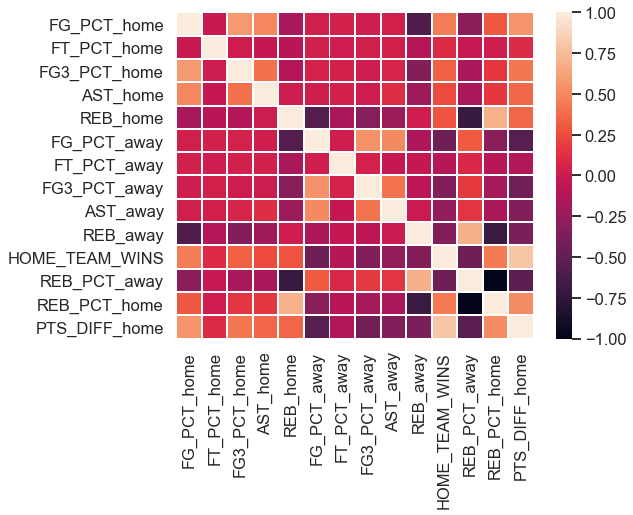

In [14]:
sns.heatmap(df.corr(),linecolor='white',linewidths=1);

---
# Machine Learning
---
### Linear Regression
In this section, we will use linear regression to predict PTS_DIFF_home(the home team's point differential). That prediction will then be converted into win and loss predictions, compared with HOME_TEAM_WINS, and displayed as a confusion matrix so that we can compare the results with the KNN classifier model we will be using later on.

#### Training a Linear Regression Model 
Training out the regression model! We are splitting up our data into an X array and y array. The X array contains the features to train on, and the y array with the target variable. 
##### X and y arrays

In [15]:
df.columns

Index(['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'REB_PCT_away', 'REB_PCT_home', 'PTS_DIFF_home'],
      dtype='object')

In [16]:
X = df.drop(['HOME_TEAM_WINS', 'PTS_DIFF_home'],axis=1) #Exclude targets
y = df['PTS_DIFF_home']

##### Train Test Split
Splitting the data into a training set and a testing set. We will train out model on the training set first and then use the test set to evaluate the model.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

##### Creating and Training the Model

In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

##### Model Evaluation
Evaluating the model by checking out the values of coefficients.

In [19]:
# print the intercept
print(lm.intercept_)

-7.417938550634602


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
FG_PCT_home,91.517299
FT_PCT_home,21.905526
FG3_PCT_home,29.310674
AST_home,0.307934
REB_home,0.791567
FG_PCT_away,-91.209891
FT_PCT_away,-16.903655
FG3_PCT_away,-23.461689
AST_away,-0.383673
REB_away,-0.714162


##### Predictions from our Model

In [21]:
predictions = lm.predict(X_test)

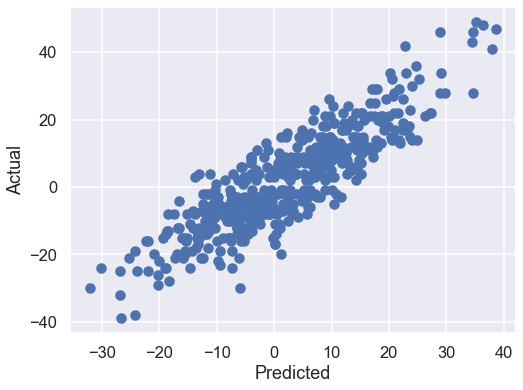

In [22]:
plt.scatter(y=y_test, x=predictions)
plt.ylabel('Actual')
plt.xlabel('Predicted');

##### Residual Histogram

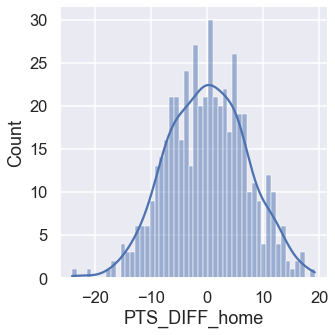

In [23]:
sns.displot((y_test-predictions),bins=50, kde=True);

#### Regression Evaluation Metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.689551239055863
MSE: 49.67429680460308
RMSE: 7.047999489543333


#### Convert Results into Confusion Matrix
For all values greater than 0 they will count as predictions of home team wins and all other values will count as predictions of away team wins. Then we will plot the results in a confusion matrix using the test values created using HOME_TEAM_WINS. This will make it easy to compare these results to the results we'll get from the KNN classifier.

In [25]:
#Convert point diffirential to binary win/loss values
pred = (predictions > 0).astype(int)
#Get y_test values for HOME_TEAM_WINS
_, _, _, y_test = train_test_split(X, df['HOME_TEAM_WINS'], test_size=0.4, random_state=101)

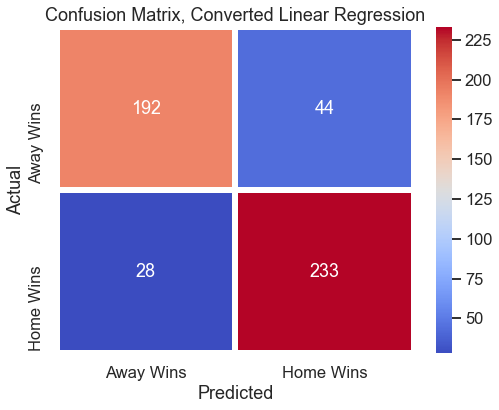

In [26]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d', cmap='coolwarm',
            linewidth=5, xticklabels=['Away Wins', 'Home Wins'], 
            yticklabels=['Away Wins', 'Home Wins'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Converted Linear Regression');

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       236
           1       0.84      0.89      0.87       261

    accuracy                           0.86       497
   macro avg       0.86      0.85      0.85       497
weighted avg       0.86      0.86      0.85       497



---
### KNN Classifier
In this section, we will try to predict the winner of each game using HOME_TEAM_WINS as the target and KNN classifier as our machine learning model. Then, we will display the results as a confusion matrix to allow us to compare the results with the linear regression model.
#### KNN - Standardize the Variables

In [28]:
df.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home,PTS_DIFF_home
1206,0.443,0.591,0.357,25.0,41.0,0.483,0.643,0.314,23.0,46.0,0,0.528736,0.471264,-13.0
1207,0.463,0.857,0.368,21.0,41.0,0.458,0.955,0.424,26.0,35.0,0,0.460526,0.539474,-3.0
1208,0.427,0.808,0.344,18.0,39.0,0.443,0.857,0.359,25.0,42.0,0,0.518519,0.481481,-6.0
1209,0.513,0.913,0.353,25.0,37.0,0.430,0.759,0.333,23.0,43.0,1,0.537500,0.462500,11.0
1210,0.505,0.588,0.340,32.0,44.0,0.507,0.912,0.407,29.0,37.0,1,0.456790,0.543210,10.0


In [29]:
scaler = StandardScaler()
scaler.fit(df.drop(['HOME_TEAM_WINS', 'PTS_DIFF_home'],axis=1)) #Exclude targets

StandardScaler()

In [30]:
scaled_features = scaler.transform(df.drop(['HOME_TEAM_WINS', 'PTS_DIFF_home'],axis=1))
scaled_features

array([[-3.57080636e-01, -1.81762718e+00, -3.24828827e-02, ...,
         2.69944034e-01,  6.67558413e-01, -6.67558413e-01],
       [-7.60876200e-04,  8.87104844e-01,  9.59712981e-02, ...,
        -1.37735413e+00, -6.13391415e-01,  6.13391415e-01],
       [-6.42136444e-01,  3.88864734e-01, -1.84292369e-01, ...,
        -3.29073482e-01,  4.75684184e-01, -4.75684184e-01],
       ...,
       [-1.33695998e+00, -2.00888865e-01,  9.83472911e-01, ...,
         4.19698413e-01,  8.83416920e-01, -8.83416920e-01],
       [-1.40822393e+00, -1.72611369e+00, -1.01340572e+00, ...,
         1.16847031e+00,  4.06818433e-01, -4.06818433e-01],
       [ 5.51534752e-01,  8.38197689e-02,  6.68176285e-01, ...,
         4.19698413e-01,  2.20099482e+00, -2.20099482e+00]])

In [31]:
df_feat = pd.DataFrame(scaled_features,columns=df.drop(['HOME_TEAM_WINS', 'PTS_DIFF_home'],axis=1).columns)
df_feat.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,REB_PCT_away,REB_PCT_home
0,-0.357081,-1.817627,-0.032483,0.059667,-0.648667,0.498215,-1.246667,-0.464158,-0.163172,0.269944,0.667558,-0.667558
1,-0.000761,0.887105,0.095971,-0.765362,-0.648667,0.038496,1.788835,0.842010,0.455453,-1.377354,-0.613391,0.613391
2,-0.642136,0.388865,-0.184292,-1.384134,-0.940967,-0.237335,0.835376,0.070183,0.249245,-0.329073,0.475684,-0.475684
3,0.890039,1.456522,-0.079193,0.059667,-1.233268,-0.476389,-0.118083,-0.238547,-0.163172,-0.179319,0.832151,-0.832151
4,0.747511,-1.848132,-0.231003,1.503467,-0.210216,0.939546,1.370481,0.640148,1.074078,-1.077845,-0.683556,0.683556


#### Train Test Split


In [32]:
X = df_feat
y = df['HOME_TEAM_WINS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Using KNN


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

#### Predictions and Evaluations
 Evaluating the KNN model

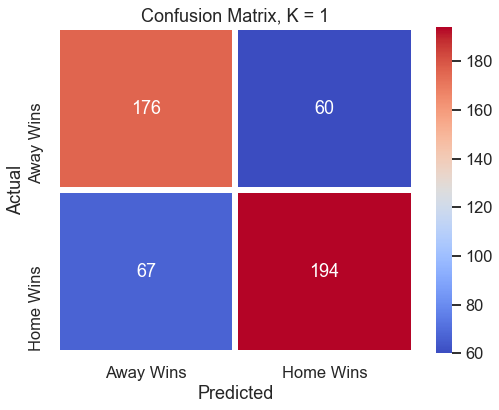

In [34]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d', cmap='coolwarm',
            linewidth=5, xticklabels=['Away Wins', 'Home Wins'], 
            yticklabels=['Away Wins', 'Home Wins'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, K = 1');

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       236
           1       0.76      0.74      0.75       261

    accuracy                           0.74       497
   macro avg       0.74      0.74      0.74       497
weighted avg       0.75      0.74      0.74       497



#### Choosing a K Value
Using elbow method to pick a good K value

In [36]:
error_rate = []

# Will take some time
for i in range(1,31):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

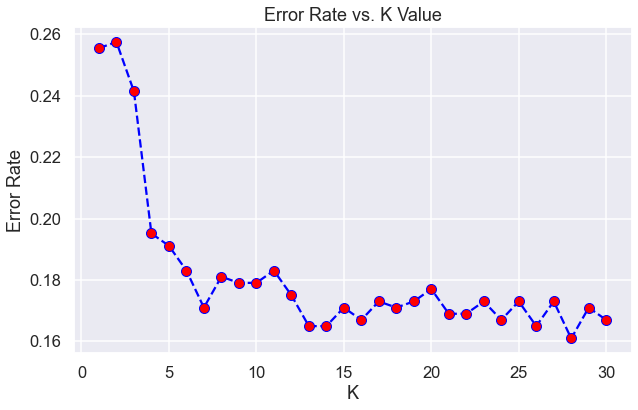

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that starting around K>16 the error rate just tends to hover around 0.16-0.18 Let's check the classification report with that K value.

In [38]:
# NOW WITH Best K value
best_k = error_rate.index(min(error_rate)) + 1 #Use K value with min error rate
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

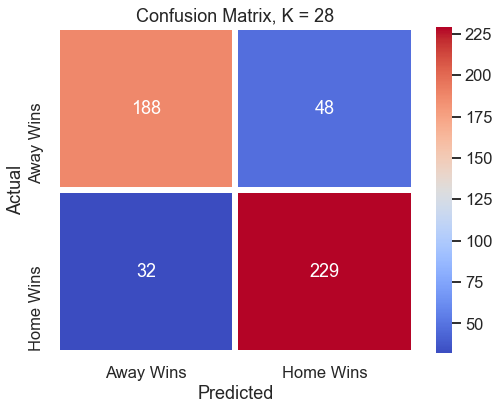

In [39]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d', cmap='coolwarm',
            linewidth=5, xticklabels=['Away Wins', 'Home Wins'], 
            yticklabels=['Away Wins', 'Home Wins'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, K = {}'.format(best_k));

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       236
           1       0.83      0.88      0.85       261

    accuracy                           0.84       497
   macro avg       0.84      0.84      0.84       497
weighted avg       0.84      0.84      0.84       497

